In [58]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import KF_tracking as KF

In [59]:
# define ODE equation
def projectile_motion_with_resistance(state, t, g, k, m, n):
    x, y, v_x, v_y = state
    n = n
    dx_dt = v_x
    dy_dt = v_y
    dv_x_dt = -(k/m) * v_x**n 
    dv_y_dt = -g - (k/m) * v_y**n
    
    return [dx_dt, dy_dt, dv_x_dt, dv_y_dt]

In [62]:
# set different parameters of ODE
# 定义参数
g = 9.8  # 重力加速度
k1 = 0.1  # 空气阻力系数
m1 = 1.0  # 物体质量
n1 = 3

k2 = 0.3608  # 空气阻力系数
m2 = 1.4060  # 物体质量
n2 = 0.7722
# 定义初始条件
x0 = 0.0  # 初始水平位置
y0 = 10  # 初始垂直位置
v_x0 = 2.0  # 初始水平速度
v_y0 = 0  # 初始垂直速度

# 定义时间点
t = np.linspace(0, 2, 100)  # 从0到2秒，共取100个时间点

# 定义初始状态向量
initial_state = [x0, y0, v_x0, v_y0]

solution_with_resistance_1 = odeint(projectile_motion_with_resistance, initial_state, t, args=(g, k1, m1, n1))
x_with_resistance_1 = solution_with_resistance_1[:, 0]
y_with_resistance_1 = solution_with_resistance_1[:, 1]
v_x_with_resistance = solution_with_resistance_1[:, 2]
v_y_with_resistance = solution_with_resistance_1[:, 3]
print(y_with_resistance_1)
solution_with_resistance_2 = odeint(projectile_motion_with_resistance, initial_state, t, args=(g, k2, m2, n2))
x_with_resistance_2 = solution_with_resistance_2[:, 0]
y_with_resistance_2 = solution_with_resistance_2[:, 1]
print(y_with_resistance_2)

[10.          9.99800022  9.99200133  9.98200569  9.96801947  9.95005448
  9.92812995  9.90227426  9.87252643  9.83893744  9.80157126  9.76050551
  9.71583177  9.66765544  9.61609516  9.56128195  9.50335766  9.44247341
  9.37878763  9.31246393  9.24366898  9.17257036  9.0993345   9.0241249
  8.94710043  8.86841401  8.78821154  8.70663101  8.62380202  8.53984542
  8.45487321  8.3689886   8.28228619  8.19485233  8.10676549  8.0180967
  7.92891008  7.83926329  7.7492081   7.65879082  7.56805285  7.47703108
  7.38575837  7.2942639   7.20257361  7.11071046  7.01869482  6.9265447
  6.83427604  6.7419029   6.64943773  6.55689149  6.46427387  6.37159341
  6.27885763  6.18607316  6.09324584  6.00038083  5.90748265  5.81455529
  5.72160227  5.62862667  5.53563121  5.44261829  5.34959002  5.25654824
  5.16349458  5.07043048  4.97735719  4.88427583  4.79118738  4.69809268
  4.60499249  4.51188747  4.41877822  4.32566523  4.23254896  4.13942981
  4.04630813  3.95318421  3.86005834  3.76693074  3.67

C:\Users\11422\AppData\Local\Temp\ipykernel_18300\3975711029.py:8: RuntimeWarning: invalid value encountered in scalar power
  dv_y_dt = -g - (k/m) * v_y**n


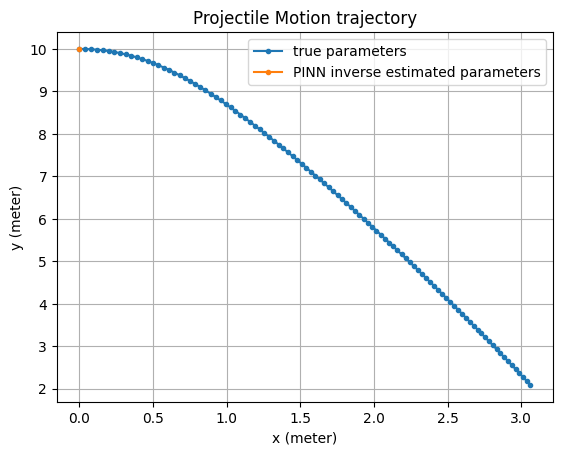

In [61]:
# 绘制轨迹
plt.plot(x_with_resistance_1, y_with_resistance_1, label = 'true parameters', marker='o', markersize = 3)
plt.plot(x_with_resistance_2, y_with_resistance_2, label = 'PINN inverse estimated parameters', marker='o', markersize = 3)
#plt.plot(state_list[:, 0], state_list[:, 1], label = 'Kalman Filter tracking', marker='o', markersize = 3)
plt.xlabel('x (meter)')
plt.ylabel('y (meter)')
plt.title('Projectile Motion trajectory')
plt.grid(True)
plt.legend()
plt.show()